In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Data Set

In [2]:
df = pd.read_csv("loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [83]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#####  Loan ID

In [5]:
df.Loan_ID.describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

In [6]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

##### Gender

In [7]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

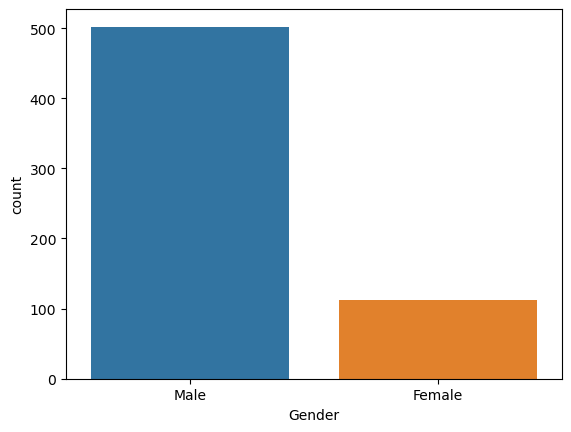

In [95]:
sns.countplot(x="Gender", data=df)
plt.show()

In [9]:
CM = len(df[df.Gender == 'Male'])
CF = len(df[df.Gender == 'Female'])
CN = len(df[df.Gender.isnull()])

In [10]:
print("Percentage of Male applicant: {:.2f}%".format((CM / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((CF / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((CN / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


##### Married

In [11]:
df.Married.describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [12]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

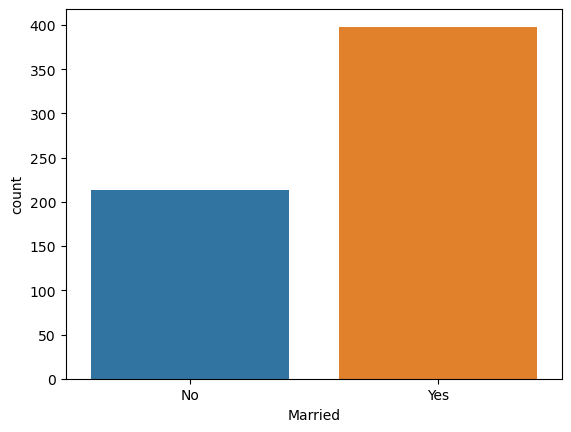

In [94]:
sns.countplot(x="Married", data=df )
plt.show()

In [16]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])

In [17]:
print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%


##### Education

In [18]:
df.Education.describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [19]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

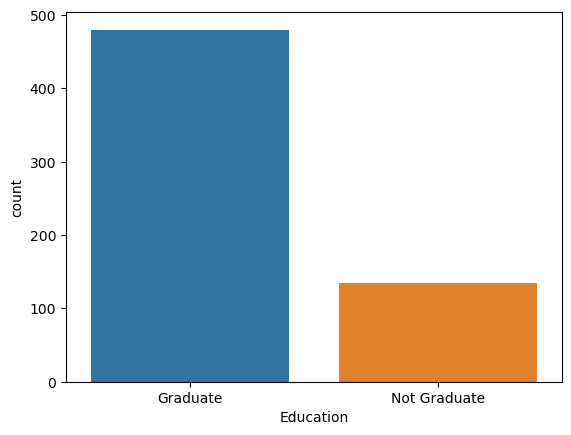

In [93]:
sns.countplot(x="Education", data=df )
plt.show()

In [21]:
cg= len(df[df.Education == 'Graduate'])
cng=len(df[df.Education == 'Not Graduate'])

In [22]:
print("Percentage of graduate applicant: {:.2f}%".format((cg / (len(df.Education))*100)))
print("Percentage of not graduate applicant: {:.2f}%".format((cng / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of not graduate applicant: 21.82%


##### Self Employed

In [23]:
df.Self_Employed.describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [24]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

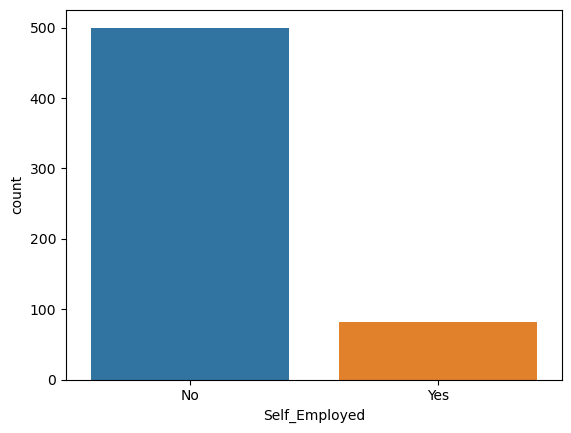

In [92]:
sns.countplot(x="Self_Employed", data=df)
plt.show()

In [26]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])

In [27]:
print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%


##### Credit History

In [28]:
df.Credit_History.describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [29]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

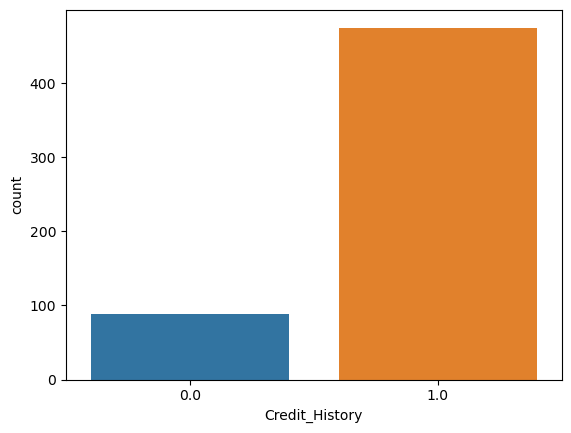

In [89]:
sns.countplot(x="Credit_History", data=df)
plt.show()

In [31]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%


##### Property Area

In [32]:
df.Property_Area.describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

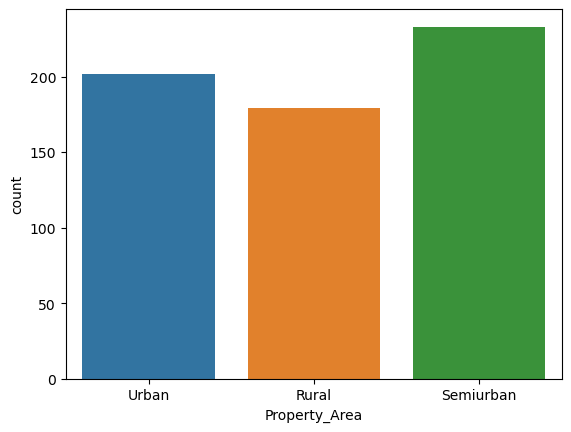

In [97]:
sns.countplot(x="Property_Area", data=df)
plt.show()

In [34]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])

In [35]:
print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%


##### Loan Status

In [36]:
df.Loan_Status.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

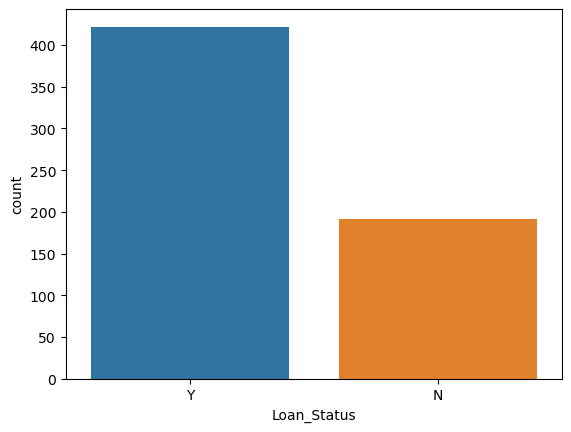

In [88]:
sns.countplot(x="Loan_Status", data=df)
plt.show()

In [38]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%


##### Loan Amount Term

In [39]:
df.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [40]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

C:\Users\Harshavardhan\AppData\Local\Temp\ipykernel_18660\613744838.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Loan_Amount_Term', y='count', data=counts, palette="blue")


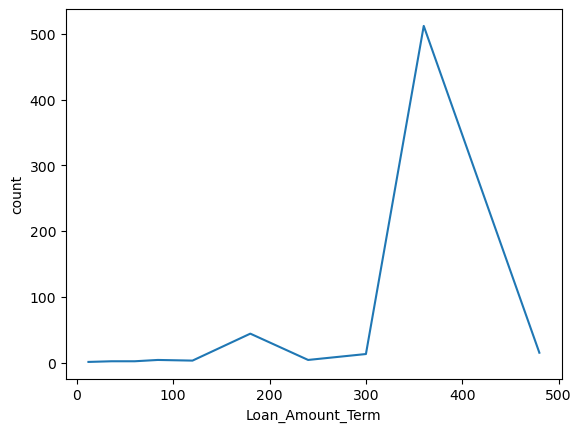

In [41]:
counts = df['Loan_Amount_Term'].value_counts().reset_index()
counts.columns = ['Loan_Amount_Term', 'count']
counts = counts.sort_values('Loan_Amount_Term')
sns.lineplot(x='Loan_Amount_Term', y='count', data=counts, palette="blue")
plt.show()

# Categorical 📊

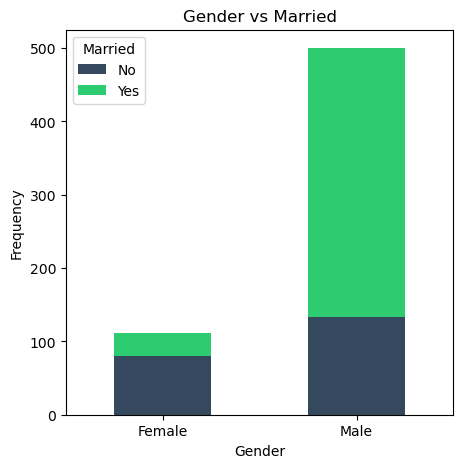

In [78]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=["#34495e", "#2ecc71"])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


 Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married

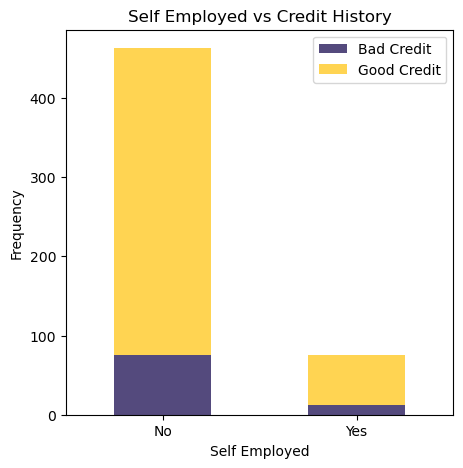

In [79]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

 Most not self employed applicants have good credit compared to self employed applicants.

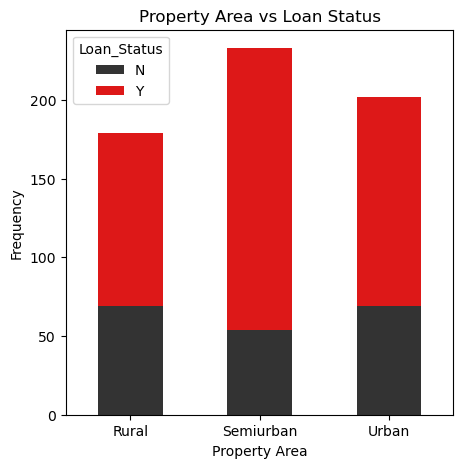

In [80]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

 Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

# Numerical 📈

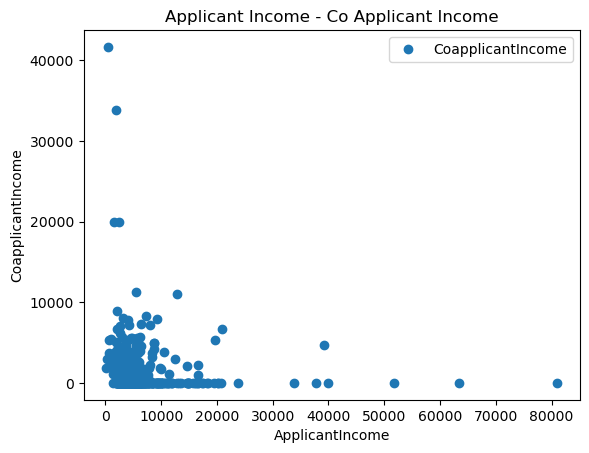

Pearson correlation: -0.11660458122889969


In [82]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))

# Correlation

C:\Users\Harshavardhan\AppData\Local\Temp\ipykernel_18660\2094240952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


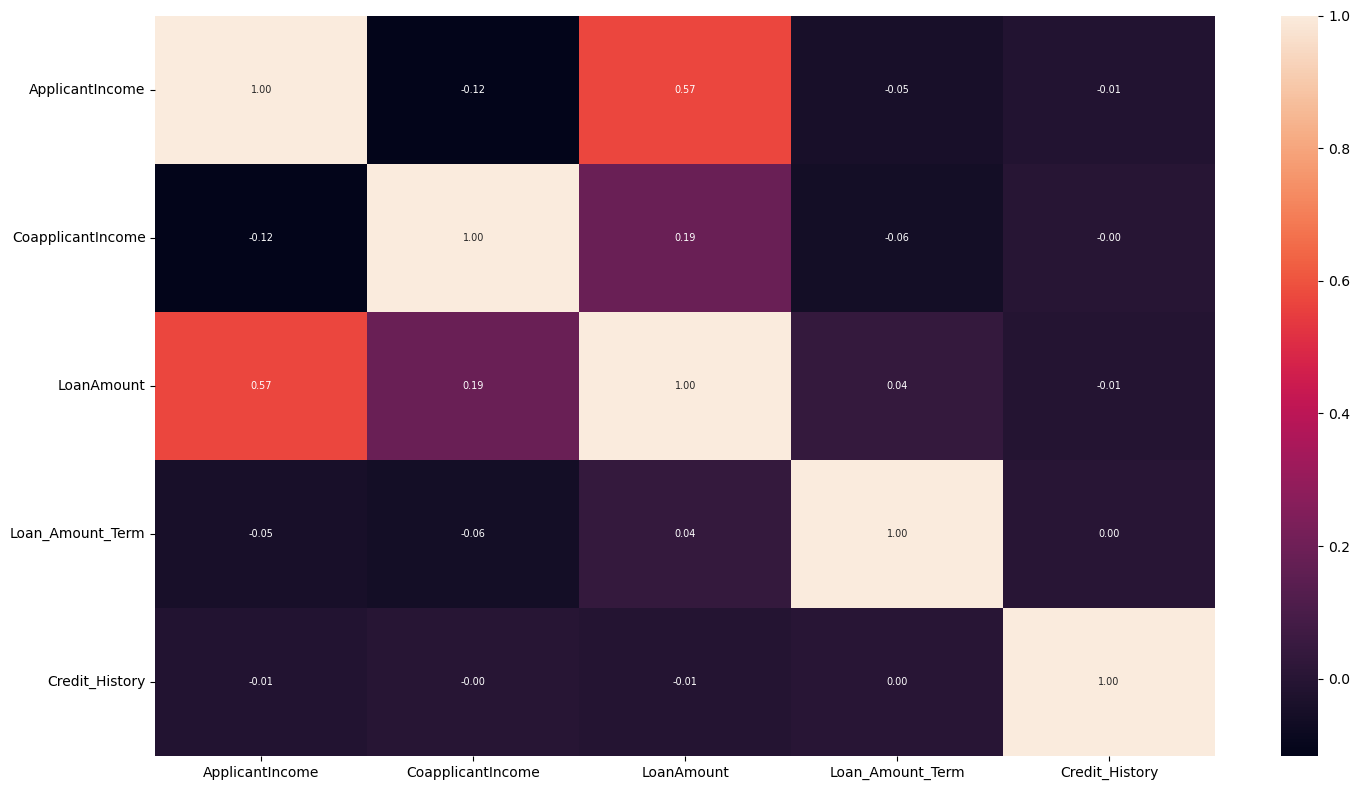

In [85]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', annot_kws = {'fontsize': 7})
plt.tight_layout()
plt.show()

# LABEL ENCODING:

In [104]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    df[col] = le.fit_transform(df[col])

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
